
# Data Science Analysis of Business Formation Data in the United States

**Motivation:**  
Understanding trends in new business formations across different industries can help policymakers, investors, and entrepreneurs make informed decisions.  
This project analyzes data from the Census Bureau related to business establishments in two major sectors: **Finance and Insurance** and **Real Estate, Rental, and Leasing**.  

**Objective:**  
- Identify growth or decline trends over recent years.
- Compare sectoral differences.
- Provide insights into regional variations.

# Data Gathering

The data was obtained from the Census Bureau's CSV dataset, which contains various metrics related to business establishments across US states, industries, and years.

*Path to dataset:* 'Finance.csv' (for financial sector) and assumed for real estate sector.

In this project, we load and analyze both datasets for comprehensive insights.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(filepath):
    """
    Load data from a CSV file into a DataFrame.

    Parameters:
        filepath (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded data.
    """
    return pd.read_csv(filepath)

df_raw = load_data('Finance.csv')
print(df_raw.head())

  State FIPS    State  119th Congressional District 2017 NAICS Code  \
0         01  Alabama                           1.0          ------   
1         01  Alabama                           1.0          11----   
2         01  Alabama                           1.0          21----   
3         01  Alabama                           1.0          22----   
4         01  Alabama                           1.0          23----   

                               NAICS Description  Number of Establishments   \
0                          Total for all sectors                    16,154    
1     Agriculture, forestry, fishing and hunting                        97    
2  Mining, quarrying, and oil and gas extraction                        20    
3                                      Utilities                        41    
4                                   Construction                     1,700    

   Employment  Employment Noise Flag  1st Quarter Payroll ($1,000)   \
0     221,498              

### Insight:

The data consists of 9127 rows and 12 columns, covering various industries and states. We note that most columns are objects (strings), even some containing numerical data with commas. Missing values exist in some columns like 'State FIPS' and 'State'.

---

## Step 2: Data Assessment and Cleaning

We focus on two industries: "Finance and insurance" and "Real estate and rental and leasing."

Steps:

- Remove rows with missing crucial info (State, NAICS Code, NAICS Description)
- Convert numeric columns stored as text to integers after removing commas
- Filter dataset to include only the two focus industries

In [2]:
# Cell 2: Data Assessment and Cleaning - Modularized cleaning steps

def clean_raw_data(df):
    """
    Clean the raw dataset by:
        - Stripping whitespace from column names
        - Dropping rows missing key info
        - Converting numeric columns with commas to integers
    
    Parameters:
        df (pd.DataFrame): Raw DataFrame.

    Returns:
        pd.DataFrame: Cleaned DataFrame.
    """
    df = df.copy()
    df.columns = df.columns.str.strip()
    
    # Drop rows with missing crucial info
    df_clean = df.dropna(subset=['State', '2017 NAICS Code', 'NAICS Description']).copy()

    numeric_cols = [
        'Number of Establishments',
        'Employment',
        '1st Quarter Payroll ($1,000)',
        'Annual Payroll ($1,000)'
    ]
    
    for col in numeric_cols:
        # Use .loc to avoid SettingWithCopyWarning
        df_clean.loc[:, col] = df_clean[col].str.replace(',', '').astype(int)
    
    return df_clean

df_clean = clean_raw_data(df_raw)

# Filter for industries of interest
industries_focus = [
    "Finance and insurance",
    "Real estate and rental and leasing"
]

def filter_industries(df, industries):
    """
    Filter the DataFrame by industry descriptions.

    Parameters:
        df (pd.DataFrame): DataFrame to filter.
        industries (list): List of industry names to keep.

    Returns:
        pd.DataFrame: Filtered DataFrame with reset index.
    """
    df_filtered = df[df['NAICS Description'].isin(industries)].copy()
    df_filtered.reset_index(drop=True, inplace=True)
    return df_filtered

df_focus = filter_industries(df_clean, industries_focus)

print(f"Filtered dataset has {df_focus.shape[0]} rows focused on our industries.\n")
print(df_focus.head())


Filtered dataset has 874 rows focused on our industries.

  State FIPS    State  119th Congressional District 2017 NAICS Code  \
0         01  Alabama                           1.0          52----   
1         01  Alabama                           1.0          53----   
2         01  Alabama                           2.0          52----   
3         01  Alabama                           2.0          53----   
4         01  Alabama                           3.0          52----   

                    NAICS Description Number of Establishments Employment  \
0               Finance and insurance                      981       5343   
1  Real estate and rental and leasing                      925       4574   
2               Finance and insurance                     1105      10354   
3  Real estate and rental and leasing                      748       3774   
4               Finance and insurance                      820       4730   

  Employment Noise Flag 1st Quarter Payroll ($1,000)

### Insight:

After cleaning, the dataset highlights only the relevant industry data. The numerical columns are now correctly typed as integers, enabling analysis.

---

## Step 3: Exploratory Data Analysis and Visualization

Let's answer these business questions:

1. What is the distribution of the number of establishments, employment, and payroll by state in these industries?  
2. Which states dominate "Finance and insurance" and "Real estate and rental and leasing" in employment and payroll?  
3. How do these two industries compare in terms of employment distribution across states?

### Aggregating data by State and Industry

In [3]:
 
def aggregate_data(df):
    """
    Aggregate numeric data by State and NAICS Description summing totals.

    Parameters:
        df (pd.DataFrame): Filtered DataFrame.

    Returns:
        pd.DataFrame: Aggregated DataFrame.
    """
    grouped = df.groupby(['State', 'NAICS Description']).agg({
        'Number of Establishments': 'sum',
        'Employment': 'sum',
        'Annual Payroll ($1,000)': 'sum'
    }).reset_index()
    return grouped

grouped = aggregate_data(df_focus)
print(grouped.head())

     State                   NAICS Description Number of Establishments  \
0  Alabama               Finance and insurance                     7027   
1  Alabama  Real estate and rental and leasing                     5148   
2   Alaska               Finance and insurance                      782   
3   Alaska  Real estate and rental and leasing                     1137   
4  Arizona               Finance and insurance                     9743   

  Employment Annual Payroll ($1,000)  
0      71027                 6380474  
1      26308                 1520659  
2       7335                  624441  
3       4664                  291389  
4     168165                15083190  


### Business Question 1: Employment by state and industry

Let's visualize employment distribution for these industries by state. # Data Exploration & Analysis 

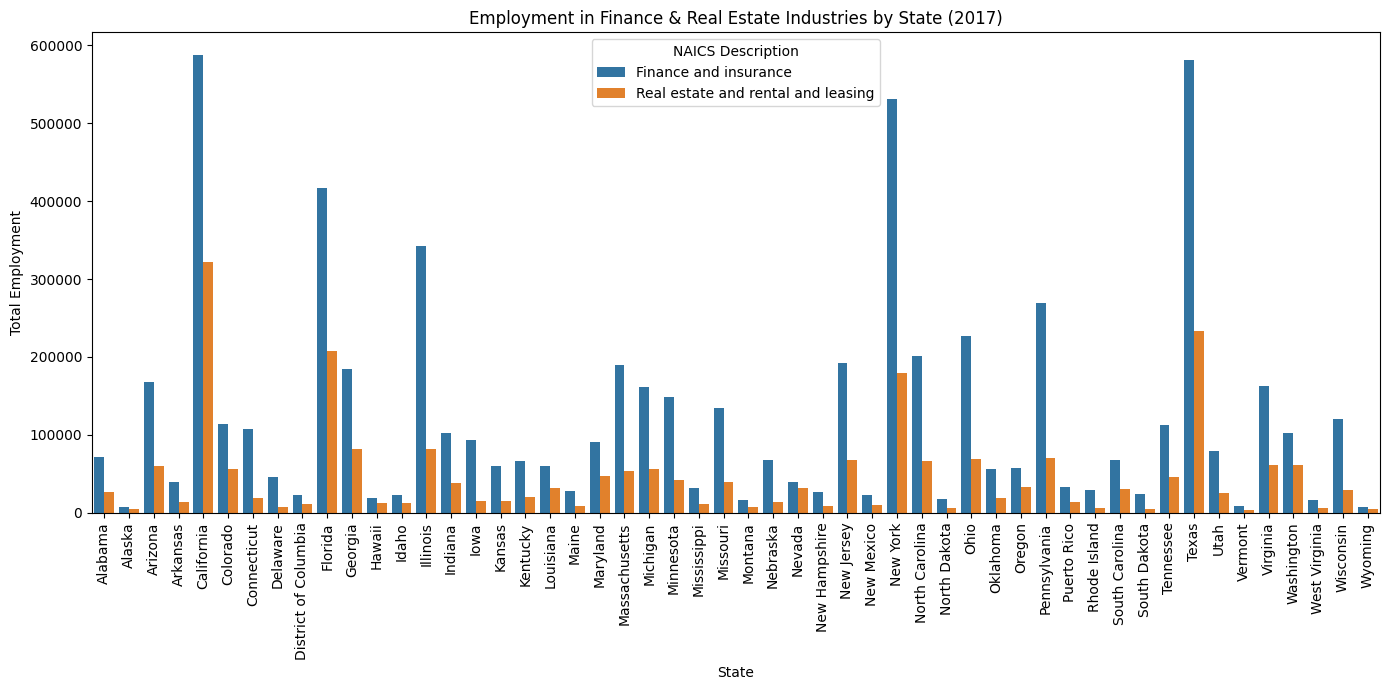

In [4]:


def plot_employment(grouped):
    """
    Plot employment totals by State and Industry.

    Parameters:
        grouped (pd.DataFrame): Aggregated data grouped by State and Industry.
    """
    plt.figure(figsize=(14,7))
    sns.barplot(data=grouped, x='State', y='Employment', hue='NAICS Description')
    plt.xticks(rotation=90)
    plt.title('Employment in Finance & Real Estate Industries by State (2017)')
    plt.ylabel('Total Employment')
    plt.xlabel('State')
    plt.tight_layout()
    plt.show()

plot_employment(grouped)

**Insight:**

- Some states, such as California, New York, and Texas, exhibit higher employment numbers in both industries.
- Finance and insurance generally shows higher employment numbers compared to real estate and rental and leasing.

---

### Business Question 2: Which states generate the highest payroll in these industries?

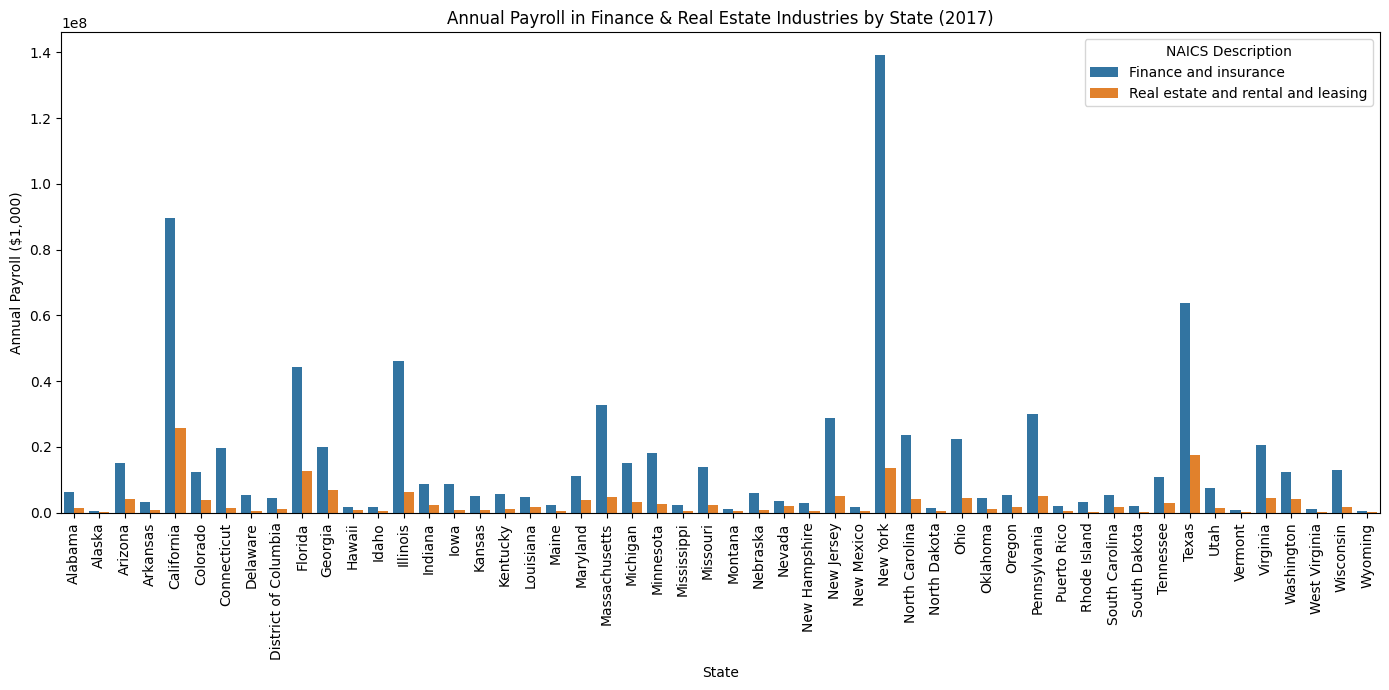

In [5]:
def plot_annual_payroll(grouped):
    """
    Plot annual payroll totals by State and Industry.

    Parameters:
        grouped (pd.DataFrame): Aggregated data grouped by State and Industry.
    """
    plt.figure(figsize=(14,7))
    sns.barplot(data=grouped, x='State', y='Annual Payroll ($1,000)', hue='NAICS Description')
    plt.xticks(rotation=90)
    plt.title('Annual Payroll in Finance & Real Estate Industries by State (2017)')
    plt.ylabel('Annual Payroll ($1,000)')
    plt.xlabel('State')
    plt.tight_layout()
    plt.show()

plot_annual_payroll(grouped)


**Insight:**

- Annual payroll closely follows employment trends.
- States with large metropolitan economies tend to have higher payrolls.
- This helps identify states with stronger economic output in these sectors.

---

### Business Question 3: Comparing employment distributions across the two industries

Let's visualize the overall employment distribution across all states using boxplots.

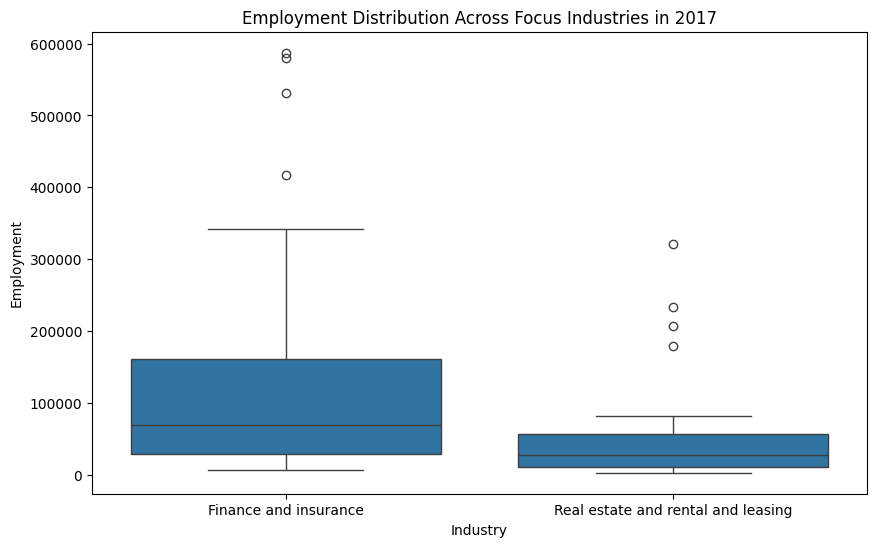

In [6]:

def plot_employment_distribution(grouped):
    """
    Plot boxplot of employment distribution across the two industries.

    Parameters:
        grouped (pd.DataFrame): Aggregated data grouped by Industry.
    """
    plt.figure(figsize=(10,6))
    sns.boxplot(data=grouped, x='NAICS Description', y='Employment')
    plt.title('Employment Distribution Across Focus Industries in 2017')
    plt.ylabel('Employment')
    plt.xlabel('Industry')
    plt.show()

plot_employment_distribution(grouped)

## Insight:

The "Finance and insurance" sector tends to have higher median employment than "Real estate and rental and leasing."
Both industries, however, show wide ranges, indicating variability across states.

## Conclusions and Recommendations
States like California, New York, and Texas lead in employment and payroll in finance and real estate sectors.
Finance and insurance hires more employees overall, whereas real estate has a more variable spread.
Economic developers and investors should consider focusing on high-performing states.
Data is limited to 2017; trends may shift across years and external economic factors should be considered.

## Next steps and future work
Consider time series analysis if multi-year data is available.
Perform regression or clustering to understand additional factors influencing employment.
Integrate socioeconomic data for more comprehensive modeling.
End of Notebook¶